# Flights Data (California 2019)
## by Imene KOLLI

## Preliminary Wrangling

> The data consists of scheduled and actual departure and arrival flights' details for all commercial flights reported by certified U.S. air carriers within the USA state of California in 2019. The data is collected by the Office of Airline Information, Bureau of Transportation Statistics (BTS).

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import glob
import os
import datetime

I downloaded each month in year 2019 as a seperate csv file and used this code to put them in one csv file named flights.csv

path = r'C:\Users\moni kolli\Desktop\project5'

files = glob.glob(os.path.join(path, "*.csv"))

df = pd.concat((pd.read_csv(f) for f in files), ignore_index = True)

df.to_csv('flights.csv', index = False)

In [3]:
data = pd.read_csv('flights.csv')

## Assessing Data

In [4]:
data.shape

(1379233, 31)

my dataset has 1,379,233 rows and 31 columns

In [5]:
data.head()

,QUARTER,MONTH,DAY_OF_WEEK,FL_DATE,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST,DEST_CITY_NAME,...,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIV_REACHED_DEST,DIV_ACTUAL_ELAPSED_TIME,DIV_ARR_DELAY,Unnamed: 30
0,1,1,5,2019-01-04,687,DEN,"Denver, CO",CO,LAX,"Los Angeles, CA",...,862.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,5,2019-01-04,1352,DEN,"Denver, CO",CO,LAX,"Los Angeles, CA",...,862.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,5,2019-01-04,1484,DEN,"Denver, CO",CO,LAX,"Los Angeles, CA",...,862.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,5,2019-01-04,1903,DEN,"Denver, CO",CO,LAX,"Los Angeles, CA",...,862.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,5,2019-01-04,2131,DEN,"Denver, CO",CO,LAX,"Los Angeles, CA",...,862.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


the last column is to be dropped

In [6]:
# random sample of 20 rows
data.sample(20)

,QUARTER,MONTH,DAY_OF_WEEK,FL_DATE,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST,DEST_CITY_NAME,...,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIV_REACHED_DEST,DIV_ACTUAL_ELAPSED_TIME,DIV_ARR_DELAY,Unnamed: 30
670306,2,6,2,2019-06-18,348,DFW,"Dallas/Fort Worth, TX",TX,SNA,"Santa Ana, CA",...,1205.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
437539,2,5,5,2019-05-03,5647,SFO,"San Francisco, CA",CA,SBA,"Santa Barbara, CA",...,262.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
517657,2,5,4,2019-05-23,2301,OAK,"Oakland, CA",CA,SAN,"San Diego, CA",...,446.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44293,1,1,3,2019-01-16,774,SFO,"San Francisco, CA",CA,ATL,"Atlanta, GA",...,2139.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
747134,3,7,7,2019-07-21,567,DEN,"Denver, CO",CO,SBA,"Santa Barbara, CA",...,916.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1227164,4,11,1,2019-11-11,1839,SAT,"San Antonio, TX",TX,ONT,"Ontario, CA",...,1166.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
944503,3,9,6,2019-09-28,1148,OAK,"Oakland, CA",CA,SLC,"Salt Lake City, UT",...,588.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1357975,4,12,6,2019-12-14,472,SMF,"Sacramento, CA",CA,LAS,"Las Vegas, NV",...,397.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
463066,2,5,5,2019-05-24,5443,SEA,"Seattle, WA",WA,LAX,"Los Angeles, CA",...,954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541156,2,5,4,2019-05-16,418,OAK,"Oakland, CA",CA,LAX,"Los Angeles, CA",...,337.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379233 entries, 0 to 1379232
Data columns (total 31 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   QUARTER                  1379233 non-null  int64  
 1   MONTH                    1379233 non-null  int64  
 2   DAY_OF_WEEK              1379233 non-null  int64  
 3   FL_DATE                  1379233 non-null  object 
 4   OP_CARRIER_FL_NUM        1379233 non-null  int64  
 5   ORIGIN                   1379233 non-null  object 
 6   ORIGIN_CITY_NAME         1379233 non-null  object 
 7   ORIGIN_STATE_ABR         1379233 non-null  object 
 8   DEST                     1379233 non-null  object 
 9   DEST_CITY_NAME           1379233 non-null  object 
 10  DEST_STATE_ABR           1379233 non-null  object 
 11  CRS_DEP_TIME             1379233 non-null  int64  
 12  DEP_TIME                 1358922 non-null  float64
 13  DEP_DELAY                1358921 non-null 

most of the types of the variables need to be changed

In [8]:
# checking for duplicates
data.duplicated().sum()

0

In [9]:
# I should convert NaN values to 0 
data.DIVERTED.value_counts()

0.0    1375899
1.0       3334
Name: DIVERTED, dtype: int64

In [10]:
data.DAY_OF_WEEK.value_counts()

1    206100
5    205625
4    203988
2    201033
3    200311
7    194952
6    167224
Name: DAY_OF_WEEK, dtype: int64

In [11]:
data.QUARTER.value_counts()

3    363194
2    346562
4    345683
1    323794
Name: QUARTER, dtype: int64

In [12]:
data.CANCELLED.value_counts()

0.0    1358374
1.0      20859
Name: CANCELLED, dtype: int64

In [13]:
data[data.DEP_TIME.isnull()]['CANCELLED'].value_counts()

1.0    20311
Name: CANCELLED, dtype: int64

In [14]:
# I think these rows contain wrong data because I can't see how can a flight depart and be considered Cancelled at the
# same time. Therefore, I will drop these 548 rows.

data.query('CANCELLED == 1') [data.DEP_TIME.notnull()]['DEP_TIME']

C:\Users\moni kolli\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


13662       619.0
13689       729.0
18137      1637.0
18300      2249.0
23110      1412.0
            ...  
1369996    2257.0
1374188    2058.0
1375137    1435.0
1375573    1453.0
1375892     751.0
Name: DEP_TIME, Length: 548, dtype: float64

In [15]:
# 2638 flights diverted but eventually reached to scheduled destination.

data.query(' DIVERTED == 1') [data.ARR_TIME.notnull()]['ARR_TIME']

C:\Users\moni kolli\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


1742       1846.0
2194       1720.0
2719       1602.0
3056       1210.0
4662        202.0
            ...  
1376815    1320.0
1376950    1612.0
1377206     139.0
1377390     709.0
1377494    1435.0
Name: ARR_TIME, Length: 2638, dtype: float64

In [16]:
# 696 flights did derivted and did not reach scheduled destination.

data.query(' DIVERTED == 1') [data.ARR_TIME.isnull()]

C:\Users\moni kolli\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,QUARTER,MONTH,DAY_OF_WEEK,FL_DATE,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST,DEST_CITY_NAME,...,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIV_REACHED_DEST,DIV_ACTUAL_ELAPSED_TIME,DIV_ARR_DELAY,Unnamed: 30
2353,1,1,1,2019-01-14,1477,PHX,"Phoenix, AZ",AZ,BUR,"Burbank, CA",...,369.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3866,1,1,1,2019-01-21,4018,LAX,"Los Angeles, CA",CA,ASE,"Aspen, CO",...,737.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4110,1,1,1,2019-01-21,5706,SFO,"San Francisco, CA",CA,ASE,"Aspen, CO",...,848.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4183,1,1,1,2019-01-21,5895,LAX,"Los Angeles, CA",CA,ASE,"Aspen, CO",...,737.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
16349,1,1,2,2019-01-08,633,BOS,"Boston, MA",MA,SFO,"San Francisco, CA",...,2704.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376684,4,12,6,2019-12-07,3445,SAN,"San Diego, CA",CA,SFO,"San Francisco, CA",...,447.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1376699,4,12,6,2019-12-07,3471,SNA,"Santa Ana, CA",CA,SFO,"San Francisco, CA",...,372.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1376719,4,12,6,2019-12-07,3499,SNA,"Santa Ana, CA",CA,SFO,"San Francisco, CA",...,372.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1377243,4,12,3,2019-12-18,3409,DAL,"Dallas, TX",TX,SFO,"San Francisco, CA",...,1476.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [17]:
data[data['CANCELLED'] == 1]

,QUARTER,MONTH,DAY_OF_WEEK,FL_DATE,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST,DEST_CITY_NAME,...,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIV_REACHED_DEST,DIV_ACTUAL_ELAPSED_TIME,DIV_ARR_DELAY,Unnamed: 30
1053,1,1,5,2019-01-11,106,LAX,"Los Angeles, CA",CA,ATL,"Atlanta, GA",...,1947.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1075,1,1,5,2019-01-11,2080,LAX,"Los Angeles, CA",CA,DEN,"Denver, CO",...,862.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1112,1,1,5,2019-01-11,1118,LAX,"Los Angeles, CA",CA,OAK,"Oakland, CA",...,337.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1741,1,1,7,2019-01-13,1768,STL,"St. Louis, MO",MO,LAX,"Los Angeles, CA",...,1592.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1819,1,1,1,2019-01-14,2242,BUR,"Burbank, CA",CA,PHX,"Phoenix, AZ",...,369.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376919,4,12,2,2019-12-17,5523,MSP,"Minneapolis, MN",MN,SFO,"San Francisco, CA",...,1589.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1377008,4,12,2,2019-12-17,5717,SFO,"San Francisco, CA",CA,BUR,"Burbank, CA",...,326.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1377032,4,12,2,2019-12-17,5759,SFO,"San Francisco, CA",CA,MSP,"Minneapolis, MN",...,1589.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1377224,4,12,3,2019-12-18,3384,SFO,"San Francisco, CA",CA,PSP,"Palm Springs, CA",...,421.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Quality

- these columns types need to be corrected : FL_DATE, CRS_DEP_TIME, DEP_TIME DEP_DELAY, CRS_ARR_TIME, ARR_TIME, ARR_DELAY
- drop the unnamed column.
- drop rows where CANCELLED == 1 and DEP_TIME is not null.

## Tidiness

- create seperate dataset for Cancelled flights.

## Cleaning Data

In [18]:
data_clean = data.copy()

#### Define

drop the unnamed column.

#### Code

In [19]:
data_clean.drop(data_clean.columns[data_clean.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

#### Test

In [20]:
data_clean.shape

(1379233, 30)

#### Define

correct columns types.

#### Code

In [21]:
# converting FL_DATE to datetime dtype.

data_clean['FL_DATE'] = pd.to_datetime(data_clean['FL_DATE'])

In [22]:
def time_function(column):
    ''' 
    This function is to convert columns that hold time values with format hhmm and dtype : object 
    to dtype : timedelta64[ns]
    
    args :
        column : the column we with to convert
        
    how it works :
        - first it cleans the data and formats them to the right format hh:mm:ss
        - then it applies the pd.to_timedelta() method
        - finally it prints the column.
    
    '''
    data_clean[column] = data_clean[column].replace('24:00' , '00:00')
    ind = data_clean[data_clean[column] < 100].index.tolist()
    data_clean.loc[ind , column] = data_clean.loc[ind , column].astype(str).apply(lambda x: '00' + x)
    data_clean[column] = data_clean[column].astype(str).apply(lambda x: x[:-2] + ':' + x[-2:]+':00' if x != '<NA>' else x)
    data_clean[column] = pd.to_timedelta(data_clean[column] , errors='coerce')
    print(data_clean[column])

In [23]:
# we want to convert this to int so that when we convert it to string we don't get the decimal part.
data_clean['DEP_TIME'] = data_clean['DEP_TIME'].astype('Int64')

In [24]:
# applying the function to the DEP_TIME column to the get the right type.

time_function('DEP_TIME')

C:\Users\moni kolli\anaconda3\lib\site-packages\pandas\core\missing.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x


0         06:04:00
1         08:22:00
2         11:07:00
3         18:16:00
4         12:58:00
            ...   
1379228   19:08:00
1379229   06:56:00
1379230   08:55:00
1379231   22:21:00
1379232   12:05:00
Name: DEP_TIME, Length: 1379233, dtype: timedelta64[ns]


In [25]:
# applying the funtion to CRS_DEP_TIME too !

time_function('CRS_DEP_TIME')

0         06:00:00
1         08:25:00
2         10:55:00
3         18:15:00
4         13:00:00
            ...   
1379228   18:46:00
1379229   07:00:00
1379230   09:00:00
1379231   22:25:00
1379232   11:25:00
Name: CRS_DEP_TIME, Length: 1379233, dtype: timedelta64[ns]


In [26]:
# checking for NaNs in the DEP_DELAY column

ind = data_clean[data_clean.DEP_DELAY.isnull()].index

In [27]:
# We found 20312. we already know that 20311 of them are of cancelled flights. therefore, we have only one to fix !

data_clean.loc[ind][['CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY' ]]

,CRS_DEP_TIME,DEP_TIME,DEP_DELAY
1053,09:45:00,NaT,NaN
1075,15:05:00,NaT,NaN
1112,19:45:00,NaT,NaN
1741,07:10:00,NaT,NaN
1819,15:05:00,NaT,NaN
...,...,...,...
1376919,17:14:00,NaT,NaN
1377008,14:23:00,NaT,NaN
1377032,10:40:00,NaT,NaN
1377224,21:10:00,NaT,NaN


In [28]:
# first we convert the timedelta from [ns] to [m] to get the minutes. then we substract the actual departure time
# from the scheduled departure time to get the delay (in minutes).

m1 = data_clean.loc[ind , 'CRS_DEP_TIME'].astype('timedelta64[m]')
m2 = data_clean.loc[ind , 'DEP_TIME'].astype('timedelta64[m]')

data_clean.loc[ind,'DEP_DELAY'] = m2 - m1

In [29]:
# we found the value that was missing ! Now we only have 20311

data_clean[data_clean.DEP_DELAY.isnull()][['CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY' ]]

,CRS_DEP_TIME,DEP_TIME,DEP_DELAY
1053,09:45:00,NaT,NaN
1075,15:05:00,NaT,NaN
1112,19:45:00,NaT,NaN
1741,07:10:00,NaT,NaN
1819,15:05:00,NaT,NaN
...,...,...,...
1376919,17:14:00,NaT,NaN
1377008,14:23:00,NaT,NaN
1377032,10:40:00,NaT,NaN
1377224,21:10:00,NaT,NaN


In [30]:
# we might want to convert that DEP_DELAY to int.

data_clean.DEP_DELAY = data_clean.DEP_DELAY.astype('Int64')

I am going to use the same function on the arriving time columns because it works :D !

In [31]:
data_clean.ARR_TIME = data_clean.ARR_TIME.astype('Int64')

In [32]:
time_function('ARR_TIME')

C:\Users\moni kolli\anaconda3\lib\site-packages\pandas\core\missing.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x


0         07:23:00
1         09:37:00
2         12:18:00
3         19:38:00
4         14:16:00
            ...   
1379228   22:24:00
1379229   10:23:00
1379230   16:19:00
1379231   00:12:00
1379232   14:38:00
Name: ARR_TIME, Length: 1379233, dtype: timedelta64[ns]


In [33]:
time_function('CRS_ARR_TIME')

0         07:45:00
1         10:05:00
2         12:35:00
3         19:55:00
4         14:35:00
            ...   
1379228   22:04:00
1379229   10:25:00
1379230   16:39:00
1379231   00:27:00
1379232   13:32:00
Name: CRS_ARR_TIME, Length: 1379233, dtype: timedelta64[ns]


In [34]:
# The reason I did not calculate the ARR_DELAY but subtracting the scheduled arr time from actual arr time is because 
# it is calculated in the DIV_ARR_DELAY which represent the delay time in minutes for the diverted flights.

ind = data_clean[data_clean.ARR_DELAY.isnull()].index
data_clean.loc[ind][['CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'DIV_ARR_DELAY' ]]

,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,DIV_ARR_DELAY
1053,17:05:00,NaT,NaN,NaN
1075,18:20:00,NaT,NaN,NaN
1112,21:00:00,NaT,NaN,NaN
1741,09:35:00,NaT,NaN,NaN
1742,17:40:00,18:46:00,NaN,66.0
...,...,...,...,...
1377243,20:29:00,NaT,NaN,NaN
1377267,20:43:00,NaT,NaN,NaN
1377270,14:43:00,NaT,NaN,NaN
1377390,23:21:00,07:09:00,NaN,468.0


In [35]:
# Last dtype changes

data_clean['QUARTER'] = data_clean['QUARTER'].astype(int)
data_clean['MONTH'] = data_clean['MONTH'].astype(int)
data_clean['DAY_OF_WEEK'] = data_clean['DAY_OF_WEEK'].astype(int)
data_clean['OP_CARRIER_FL_NUM'] = data_clean['OP_CARRIER_FL_NUM'].astype(str)
data_clean.DIVERTED = data_clean.DIVERTED.astype(int)
data_clean.DIVERTED = data_clean.DIVERTED.astype(str)

#### Test

In [36]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379233 entries, 0 to 1379232
Data columns (total 30 columns):
 #   Column                   Non-Null Count    Dtype          
---  ------                   --------------    -----          
 0   QUARTER                  1379233 non-null  int32          
 1   MONTH                    1379233 non-null  int32          
 2   DAY_OF_WEEK              1379233 non-null  int32          
 3   FL_DATE                  1379233 non-null  datetime64[ns] 
 4   OP_CARRIER_FL_NUM        1379233 non-null  object         
 5   ORIGIN                   1379233 non-null  object         
 6   ORIGIN_CITY_NAME         1379233 non-null  object         
 7   ORIGIN_STATE_ABR         1379233 non-null  object         
 8   DEST                     1379233 non-null  object         
 9   DEST_CITY_NAME           1379233 non-null  object         
 10  DEST_STATE_ABR           1379233 non-null  object         
 11  CRS_DEP_TIME             1379233 non-null  timedel

#### Define

drop rows where CANCELLED == 1 and DEP_TIME is not null

#### Code

In [37]:
# I think these are wrong because a flight can't be cancelled and yet have a departure time

wrong = data_clean.query('CANCELLED == 1') [data_clean.DEP_TIME.notnull()]['DEP_TIME'].index.tolist()

C:\Users\moni kolli\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
data_clean = data_clean.drop(wrong)

#### Test

In [39]:
data_clean.query('CANCELLED == 1')['DEP_TIME']

1053      NaT
1075      NaT
1112      NaT
1741      NaT
1819      NaT
           ..
1376919   NaT
1377008   NaT
1377032   NaT
1377224   NaT
1377267   NaT
Name: DEP_TIME, Length: 20311, dtype: timedelta64[ns]

#### Define

Create seperate dataset for Cancelled flights.

#### Code

In [40]:
data_cancelled = data_clean[data_clean['CANCELLED'] == 1]
data_cancelled.shape

(20311, 30)

In [41]:
data_cancelled.DIVERTED.value_counts()

0    20311
Name: DIVERTED, dtype: int64

In [42]:
data_cancelled.drop(columns=['CANCELLED','DEP_TIME', 'DEP_DELAY', 'ARR_TIME', 'ARR_DELAY','DIVERTED','AIR_TIME', 'CARRIER_DELAY',
                             'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 
                             'DIV_REACHED_DEST', 'DIV_ACTUAL_ELAPSED_TIME','DIV_ARR_DELAY'], inplace=True)

C:\Users\moni kolli\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


#### Test

In [43]:
data_cancelled

,QUARTER,MONTH,DAY_OF_WEEK,FL_DATE,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST,DEST_CITY_NAME,DEST_STATE_ABR,CRS_DEP_TIME,CRS_ARR_TIME,CANCELLATION_CODE,DISTANCE
1053,1,1,5,2019-01-11,106,LAX,"Los Angeles, CA",CA,ATL,"Atlanta, GA",GA,09:45:00,17:05:00,B,1947.0
1075,1,1,5,2019-01-11,2080,LAX,"Los Angeles, CA",CA,DEN,"Denver, CO",CO,15:05:00,18:20:00,A,862.0
1112,1,1,5,2019-01-11,1118,LAX,"Los Angeles, CA",CA,OAK,"Oakland, CA",CA,19:45:00,21:00:00,A,337.0
1741,1,1,7,2019-01-13,1768,STL,"St. Louis, MO",MO,LAX,"Los Angeles, CA",CA,07:10:00,09:35:00,B,1592.0
1819,1,1,1,2019-01-14,2242,BUR,"Burbank, CA",CA,PHX,"Phoenix, AZ",AZ,15:05:00,17:35:00,A,369.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376919,4,12,2,2019-12-17,5523,MSP,"Minneapolis, MN",MN,SFO,"San Francisco, CA",CA,17:14:00,19:43:00,A,1589.0
1377008,4,12,2,2019-12-17,5717,SFO,"San Francisco, CA",CA,BUR,"Burbank, CA",CA,14:23:00,15:48:00,A,326.0
1377032,4,12,2,2019-12-17,5759,SFO,"San Francisco, CA",CA,MSP,"Minneapolis, MN",MN,10:40:00,16:38:00,A,1589.0
1377224,4,12,3,2019-12-18,3384,SFO,"San Francisco, CA",CA,PSP,"Palm Springs, CA",CA,21:10:00,22:40:00,C,421.0


In [44]:
data_clean = data_clean[data_clean['CANCELLED'] != 1]
data_clean.drop(columns=['CANCELLED', 'CANCELLATION_CODE'], inplace=True)

In [45]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358374 entries, 0 to 1379232
Data columns (total 28 columns):
 #   Column                   Non-Null Count    Dtype          
---  ------                   --------------    -----          
 0   QUARTER                  1358374 non-null  int32          
 1   MONTH                    1358374 non-null  int32          
 2   DAY_OF_WEEK              1358374 non-null  int32          
 3   FL_DATE                  1358374 non-null  datetime64[ns] 
 4   OP_CARRIER_FL_NUM        1358374 non-null  object         
 5   ORIGIN                   1358374 non-null  object         
 6   ORIGIN_CITY_NAME         1358374 non-null  object         
 7   ORIGIN_STATE_ABR         1358374 non-null  object         
 8   DEST                     1358374 non-null  object         
 9   DEST_CITY_NAME           1358374 non-null  object         
 10  DEST_STATE_ABR           1358374 non-null  object         
 11  CRS_DEP_TIME             1358374 non-null  timedel

## Storing Data 

In [46]:
data_cancelled.to_csv('flight_cancelled.csv', index = False)

In [47]:
data_clean.to_csv('flight_master.csv', index = False)

### What is the structure of your dataset?

> I have 1358374 rows in my main dataset **data_clean** and 28 columns. each column represent a variable. these are my variable :
- **QUARTER**
- **MONTH**
- **DAY_OF_WEEK** : 1 (Monday) - 7 (Sunday)
- **FL_DATE** : flight date (yyyymmdd)
- **OP_CARRIER_FL_NUM** :  Flight Number
- **ORIGIN** : Origin Airport
- **ORIGIN_CITY_NAME** : Origin Airport's city
- **ORIGIN_STATE_ABR** : Origin Airport's state code
- **DEST** : destination Airport
- **DEST_CITY_NAME** : destination Airport's city
- **DEST_STATE_ABR** : destination Airport's state code
- **CRS_DEP_TIME** : Scheduled Departure Time (local time: hhmm)
- **DEP_TIME** : Actual Departure Time (local time: hhmm)		
- **DEP_DELAY** : Difference in minutes between scheduled and actual departure time. Early departures shown negative.
- **CRS_ARR_TIME** : scheduled arrival time (local, hhmm)
- **ARR_TIME** : Actual arrival time (local, hhmm)
- **ARR_DELAY** : Difference in minutes between scheduled and actual arrival time. Early arrivals shown negative.
- **DIVERTED** : 	Diverted Flight Indicator (1=Yes)
- **AIR_TIME** : Flight Time, in Minutes
- **DISTANCE** : Distance between airports (miles)
- **CARRIER_DELAY** : Carrier Delay, in Minutes
- **WEATHER_DELAY** : Weather Delay, in Minutes		
- **NAS_DELAY** : National Air System Delay, in Minutes
- **SECURITY_DELAY** : Security Delay, in Minutes
- **LATE_AIRCRAFT_DELAY** : Late Aircraft Delay, in Minutes
- **DIV_REACHED_DEST** : Diverted Flight Reaching Scheduled Destination Indicator (1=Yes)
- **DIV_ACTUAL_ELAPSED_TIME** : Elapsed Time of Diverted Flight Reaching Scheduled Destination, in Minutes. The ActualElapsedTime column remains NULL for all diverted flights.
- **DIV_ARR_DELAY** : Difference in minutes between scheduled and actual arrival time for a diverted flight reaching scheduled destination. The ArrDelay column remains NULL for all diverted flights.




> My second dataset **data_cancelled** contain the data about cancelled flights. including only 15 variables out of 28 in my main dataset. the only variable in that is not the main dataset is CANCELLATION_CODE. 
- **CANCELLATION_CODE** : reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
> 

### What is/are the main feature(s) of interest in your dataset?

- the main feature in my main dataset is DEP_DELAY. I want to know why a flight departs late and what are the consequences of that.

- the main feature in my cancelled dataset is CANCELLATION_CODE. I will try to find out everything about why each  cancellation type occure and what is it related to.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> CRS_DEP_TIME, QUARTER, MONTH, DAY_OF_WEEK, ORIGIN, DEST, DISTANCE are the features that will be used much in my investigation into my main dataset.

> CANCELLATION_CODE and ORIGIN are the features that will be used in my cancelled flights dataset investigation.

## Univariate Exploration

### 1 -  Flight_master.csv

- first I am going to explore my flight_master.csv dataset

In [48]:
df = pd.read_csv('flight_master.csv')
df.shape

(1358374, 28)

In [49]:
a = df.describe()
a = a.astype(int)
a

,QUARTER,MONTH,DAY_OF_WEEK,OP_CARRIER_FL_NUM,DEP_DELAY,ARR_DELAY,DIVERTED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIV_REACHED_DEST,DIV_ACTUAL_ELAPSED_TIME,DIV_ARR_DELAY
count,1358374,1358374,1358374,1358374,1358374,1355040,1358374,1355040,1358374,252734,252734,252734,252734,252734,3334,2638,2638
mean,2,6,3,2100,10,4,0,149,1132,20,1,15,0,25,0,468,243
std,1,3,1,1713,44,46,0,95,804,63,21,34,3,50,0,220,216
min,1,1,1,1,-34,-91,0,13,66,0,0,0,0,0,0,148,22
25%,2,4,2,735,-5,-15,0,65,407,0,0,0,0,0,1,333,121
50%,3,7,4,1658,-2,-6,0,117,853,0,0,2,0,2,1,436,176
75%,4,10,6,2824,8,7,0,227,1797,18,0,19,0,31,1,525,264
max,4,12,7,7664,2209,2206,1,476,2704,2041,1570,1447,1078,2206,1,1793,1536


I will start by looking at the distribution of my feature of interest DEP_DELAY

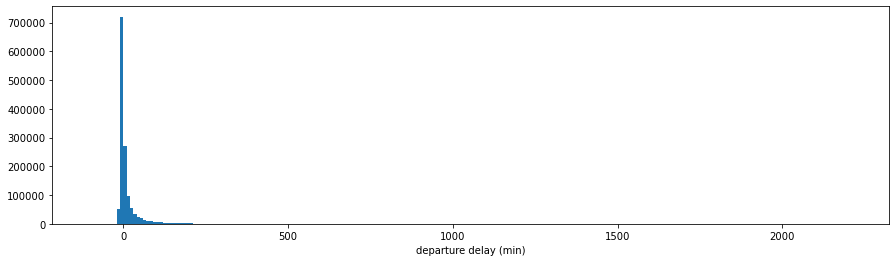

In [50]:
plt.figure(figsize=[15,4])
binsize = 10
bins = np.arange(-100, df['DEP_DELAY'].max()+binsize, binsize)
plt.hist(data = df, x = 'DEP_DELAY', bins = bins)
plt.xlabel('departure delay (min)');

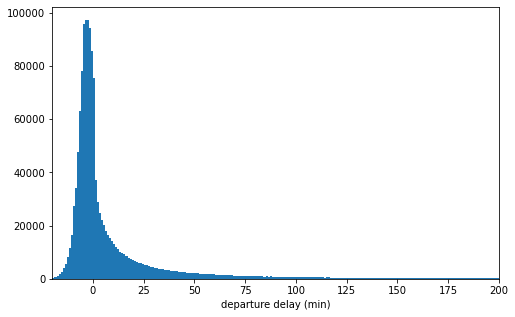

In [51]:
plt.figure(figsize=[8, 5])

bin_edges = np.arange(-20, 201+1,1)
plt.hist(data = df, x = 'DEP_DELAY', bins = bin_edges)
plt.xlim(-20, 200)
plt.xlabel('departure delay (min)');

DEP_DELAY or simply the departure delay in minutes looks normally distributed but long-tailed due to outliers. But with the use of axis limits, we are able to see the normal distribution clearly.

Next, let's look at the scheduled departure time variable : CRS_DEP_TIME

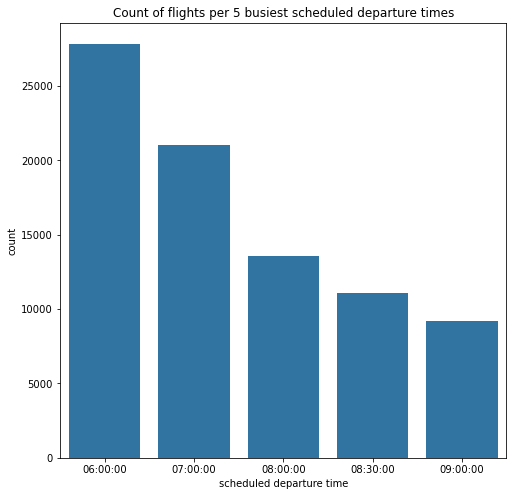

In [52]:
a = df['CRS_DEP_TIME'].value_counts()[:5]
b = a.index.tolist()
c = []
for i in b:
    i.split()
    c.append(i.split()[-1].split('.')[0])

plt.figure(figsize=[8,8])

sb.barplot(c, a.values, color = sb.color_palette()[0])
plt.title('Count of flights per 5 busiest scheduled departure times')
plt.xlabel('scheduled departure time')
plt.ylabel('count');

CRS_DEP_TIME variable has many unique values. I decided to plot only the 5 most frequent ones in my dataset. 

- 6 am is the busiest scheduled departure time. 
- the 5 busiest departure times range from 6am to 9am. it seems like there are more flights in the early morning than in the rest of the day.

Next I am going to look at the distribution of flights by date in terms of Quarter, Month and day of the week

next

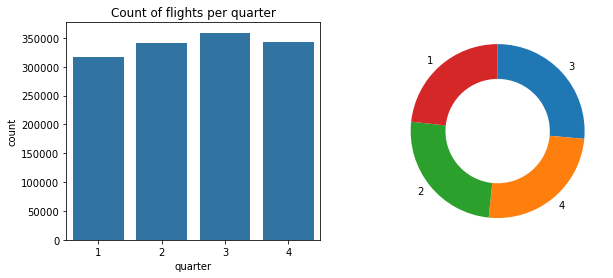

In [53]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
sb.countplot(data = df , x = 'QUARTER', color = sb.color_palette()[0])
plt.title('Count of flights per quarter')
plt.xlabel('quarter')
plt.ylabel('count');

plt.subplot(1,2,2)
sorted_counts = df['QUARTER'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});

- it looks like the first quarter of the year has the least number of flights.
- the third Quarter is the busiest in terms of number of flights. This is probably due to summer travels.

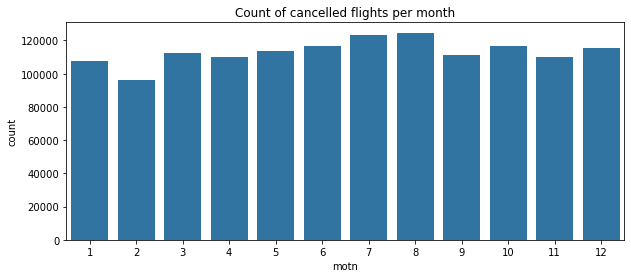

In [54]:
plt.figure(figsize=[10,4])

sb.countplot(data = df , x = 'MONTH', color = sb.color_palette()[0])
plt.title('Count of cancelled flights per month')
plt.xlabel('motn')
plt.ylabel('count');

- July and Augest are the months with the most flights. Again, this is explained by summer travelling.

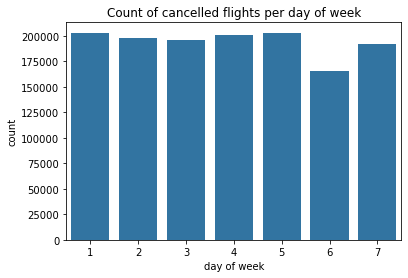

In [55]:
plt.figure(figsize=[6,4])

sb.countplot(data = df , x = 'DAY_OF_WEEK', color = sb.color_palette()[0])
plt.title('Count of cancelled flights per day of week')
plt.xlabel('day of week')
plt.ylabel('count');

1 (Monday) - 7 (Sunday)

- Saturday scores the least count of flights comparing to the rest days of the week.
- Sunday is the second least count of flights.

Which means there are less flights on the weekends than there is on weekdays.

Next, I am going to explore the Origin and Destination columns

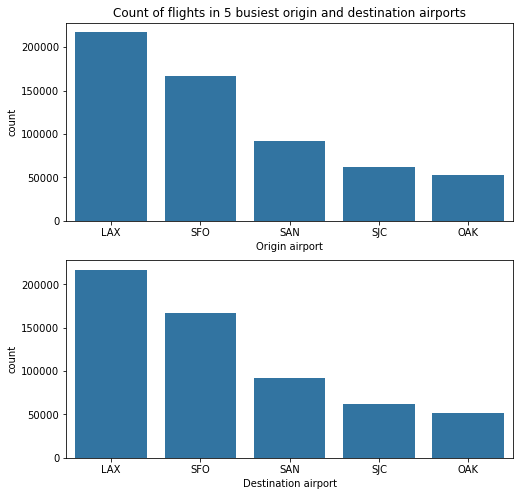

In [56]:
a = df.ORIGIN.value_counts()[:5]
b = df.DEST.value_counts()[:5]

plt.figure(figsize=[8,8])
plt.subplot(2,1,1)
color = sb.color_palette()[0]
sb.barplot(a.index, a.values, color = sb.color_palette()[0])
plt.title('Count of flights in 5 busiest origin and destination airports')
plt.ylabel('count')
plt.xlabel('Origin airport')

plt.subplot(2,1,2)
color = sb.color_palette()[0]
sb.barplot(b.index, b.values, color = sb.color_palette()[0])
plt.ylabel('count')
plt.xlabel('Destination airport');

It looks like the busiest departure airports are also the busiest arrival/destination airports in terms of flight count

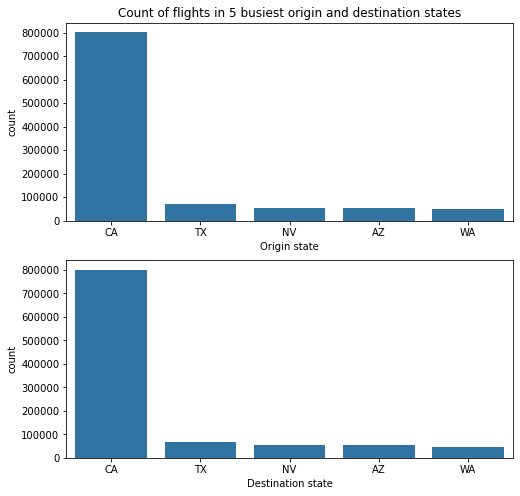

In [57]:
a = df.ORIGIN_STATE_ABR.value_counts()[:5]
b = df.DEST_STATE_ABR.value_counts()[:5]

plt.figure(figsize=[8,8])
plt.subplot(2,1,1)
color = sb.color_palette()[0]
sb.barplot(a.index, a.values, color = sb.color_palette()[0])
plt.title('Count of flights in 5 busiest origin and destination states')
plt.ylabel('count')
plt.xlabel('Origin state')

plt.subplot(2,1,2)
color = sb.color_palette()[0]
sb.barplot(b.index, b.values, color = sb.color_palette()[0])
plt.ylabel('count')
plt.xlabel('Destination state');

Because my dataset is focused on flights departing or arriving to CA state airports, it is only logical that CA is the most frequent state in terms of flight count.

However, we can see that the flights departing from or arriving to CA state airports are of the same states TX , NV, AZ, and WA.

Next, I will investigate my first quantitative variable Distance.

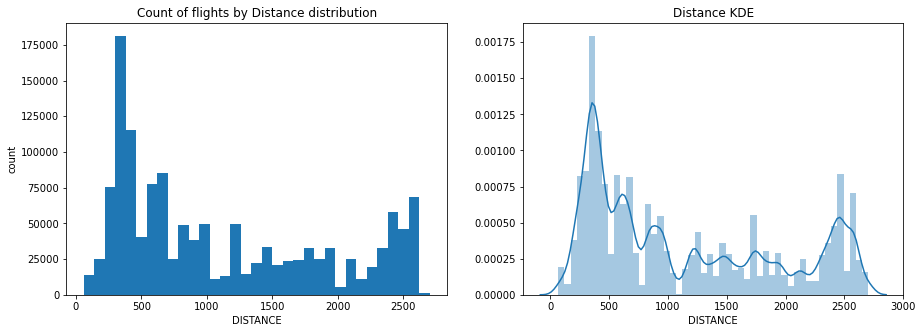

In [58]:
plt.figure(figsize=[15, 5])

# the left plot
plt.subplot(1,2,1)
bins = np.arange(60, df['DISTANCE'].max(), 80)
plt.hist(data = df, x = 'DISTANCE', bins = bins)
plt.title('Count of flights by Distance distribution')
plt.ylabel('count')
plt.xlabel('DISTANCE')

# the right plot
plt.subplot(1,2,2)
sb.distplot(df['DISTANCE'])
plt.title('Distance KDE');

the right plot shows that the frequency of short distance flights is much higher than long distance flights. 

- flights with distance between 200 and 500 miles are the most frequent.
- flights count decrease with increase of distance, but increase again for flight distance 2500 miles to reach 75,000 flight.
- the highest flight count is over 175,000 for flight distance between 200 and 500 miles.

Next, we will remain with univariate plotting but for my second dataset, the cancelled flights dataset.

In [59]:
df_cancelled = pd.read_csv('flight_cancelled.csv')
df_cancelled.shape

(20311, 15)

First, a quick numeric summary of the dataset

In [60]:
df_cancelled.head()

,QUARTER,MONTH,DAY_OF_WEEK,FL_DATE,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST,DEST_CITY_NAME,DEST_STATE_ABR,CRS_DEP_TIME,CRS_ARR_TIME,CANCELLATION_CODE,DISTANCE
0,1,1,5,2019-01-11,106,LAX,"Los Angeles, CA",CA,ATL,"Atlanta, GA",GA,0 days 09:45:00.000000000,0 days 17:05:00.000000000,B,1947.0
1,1,1,5,2019-01-11,2080,LAX,"Los Angeles, CA",CA,DEN,"Denver, CO",CO,0 days 15:05:00.000000000,0 days 18:20:00.000000000,A,862.0
2,1,1,5,2019-01-11,1118,LAX,"Los Angeles, CA",CA,OAK,"Oakland, CA",CA,0 days 19:45:00.000000000,0 days 21:00:00.000000000,A,337.0
3,1,1,7,2019-01-13,1768,STL,"St. Louis, MO",MO,LAX,"Los Angeles, CA",CA,0 days 07:10:00.000000000,0 days 09:35:00.000000000,B,1592.0
4,1,1,1,2019-01-14,2242,BUR,"Burbank, CA",CA,PHX,"Phoenix, AZ",AZ,0 days 15:05:00.000000000,0 days 17:35:00.000000000,A,369.0


I will start the investigation by plotting my variable of interest CANCELLATION_CODE.

as a reminder, this is what each value in the variable mean :

- A = carrier 
- B = weather
- C = NAS 
- D = security

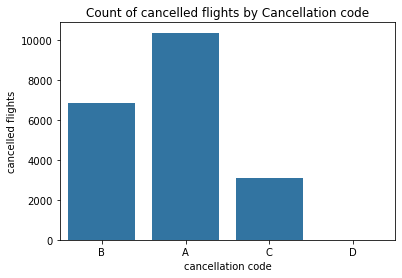

In [61]:
sb.countplot(data = df_cancelled, x = 'CANCELLATION_CODE', color = sb.color_palette()[0] )
plt.title('Count of cancelled flights by Cancellation code')
plt.xlabel('cancellation code')
plt.ylabel('cancelled flights');

This gives us a great insight on what causes flights to be deleted.

- it seems like the most frequent reason for flight cancellation is A : Carrier.
- flight that got cancelled because of carrier are over 10,000 which represent almost 50% of all flights cancelled.
- the second most frequent reason for flights to be cancelled is B : weather.
- the D : Security seem to rarely be a reason for a flight to be cancelled. The number of flights cancelled due to Security issues is so small comparing to other reasons (A, B, C) that the D bar does not appear at all in the bar chart.

Next, let's see if the departure scheduled time related to flight cancellation

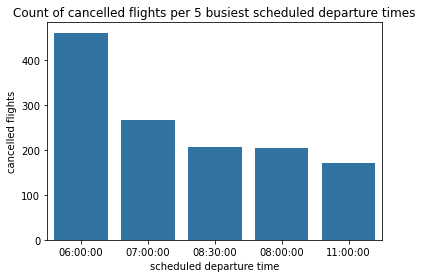

In [62]:
a = df_cancelled['CRS_DEP_TIME'].value_counts()[:5]
b = a.index.tolist()
c = []
for i in b:
    i.split()
    c.append(i.split()[-1].split('.')[0])


color = sb.color_palette()[0]
sb.barplot(c, a.values, color = sb.color_palette()[0]);
plt.title('Count of cancelled flights per 5 busiest scheduled departure times');
plt.xlabel('scheduled departure time');
plt.ylabel('cancelled flights');

First, I have filtered out the dataset by the 5 most scheduled departure times.

The 5 most departure times scheduled are : 6am , 7am, 8:30am, 8am, and 11am.

- It looks like flights scheduled at 6am are the most cancelled. But this can be due to 6am being the most departure time scheduled as we've seen previously.
- The scheduled departure time seem to have an impact on flight cancellation.

Next, I will investigate the Quarter, Month, and Day of the week 

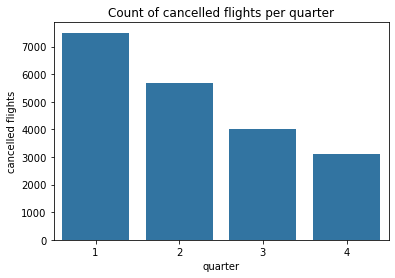

In [63]:
sb.countplot(data = df_cancelled , x = 'QUARTER', color = sb.color_palette()[0])
plt.title('Count of cancelled flights per quarter')
plt.xlabel('quarter')
plt.ylabel('cancelled flights');

As a reminder, We have previously seen that the first Quarter was the quarter with the least number of flights. and the third quarter was the one with the most flights.

- Surprisingly, the first quarter scores the highest number of cancelled flights with a count of over 7000 flight.
- The trend in the cancelled flights count looks negativally linear through the year quarters with the 4th one being the quarter with the least cancelled flights (no more than 3000)

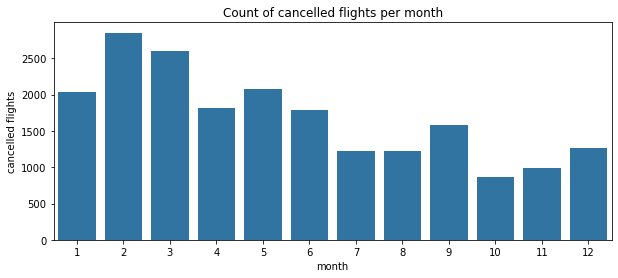

In [64]:
plt.figure(figsize=[10,4])

sb.countplot(data = df_cancelled , x = 'MONTH', color = sb.color_palette()[0])
plt.title('Count of cancelled flights per month')
plt.xlabel('month')
plt.ylabel('cancelled flights');

February, the month with the least flights is the month the most flights being cancelled.

- it looks passengers don't miss their flights in the summer season flights.

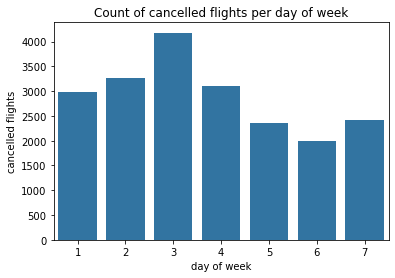

In [65]:
sb.countplot(data = df_cancelled , x = 'DAY_OF_WEEK', color = sb.color_palette()[0])
plt.title('Count of cancelled flights per day of week')
plt.xlabel('day of week')
plt.ylabel('cancelled flights');

Previously, we didn't see any trend in the flights count by day of the week except that Saturday was the day with the least flights and Sunday the second least. We concluded that there are more flights on weekdays than on weekends.

- we can see here that Wednesday is the day with the most cancelled flights. (over 4000)
- Saturday is the day with the least cancelled flights.

Next, The distance variable, does it have an impact on the cancellation of flights ?

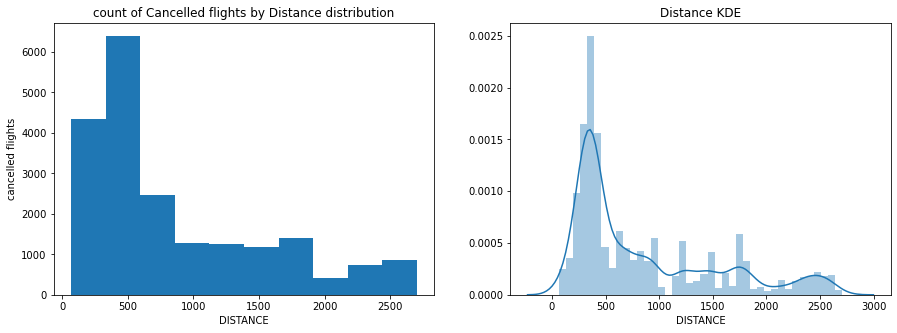

In [66]:
plt.figure(figsize=[15, 5])

# the left plot
plt.subplot(1,2,1)
plt.hist(data = df_cancelled, x = 'DISTANCE')
plt.title('count of Cancelled flights by Distance distribution')
plt.xlabel('DISTANCE')
plt.ylabel('cancelled flights')

# the right plot
plt.subplot(1,2,2)
sb.distplot(df_cancelled['DISTANCE'])
plt.title('Distance KDE');

The distribution of the distance variable for the cancelled flights somehow matches the one we have seen previously.

- The flights with short distances are the ones being cancelled the most.
- flights of distances between 250 and 500 miles got cancelled more than 6000 times.
- As the distance of the flight increases, the count of cancelled flights decreases.

This is probably due to the number of short distance flights being much higher than long distance ones.

Next, let's look at the Airports 

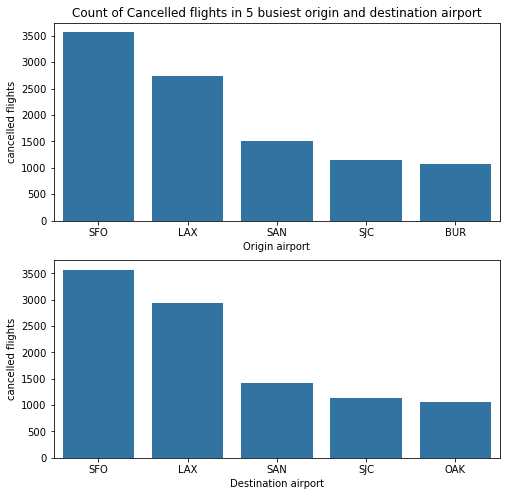

In [67]:
a = df_cancelled.ORIGIN.value_counts()[:5]
b = df_cancelled.DEST.value_counts()[:5]

plt.figure(figsize=[8, 8])
plt.subplot(2,1,1)
color = sb.color_palette()[0]
sb.barplot(a.index, a.values, color = sb.color_palette()[0]);
plt.title('Count of Cancelled flights in 5 busiest origin and destination airport')
plt.ylabel('cancelled flights')
plt.xlabel('Origin airport')

plt.subplot(2,1,2)
color = sb.color_palette()[0]
sb.barplot(b.index, b.values, color = sb.color_palette()[0])
plt.ylabel('cancelled flights')
plt.xlabel('Destination airport');

After filtering out the busiest airports for departure and arrival (origin and destination), we can see that the airports witht the most flights are also the airports with the most cancelled flights. (stay away from the busy airports people!)

> side note: the plots I created for cancelled flights dataset can be considered bivariate because they are based the cancelled variable in the original dataset.

## Bivariate Exploration

To start off with, I want to look at the categorical variables.

Like we did in the Univariate exploration, I will start with the main dataset and later the cancelled flights dataset.

Now it's time to answer some questions. Let's look at the scheduled departure time, does it cause any departure delay ?

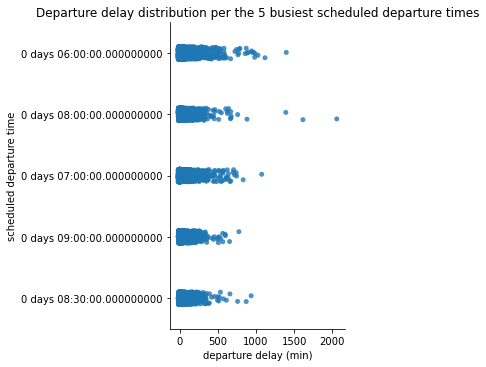

In [68]:
a = df.CRS_DEP_TIME.value_counts()[:5]
a = a.index

df1 = df.loc[df['CRS_DEP_TIME'].isin(a)]

sb.catplot(y="CRS_DEP_TIME", x="DEP_DELAY", data= df1 , color = sb.color_palette()[0], alpha = 0.8)

plt.title('Departure delay distribution per the 5 busiest scheduled departure times')
plt.ylabel('scheduled departure time')
plt.xlabel('departure delay (min)');

Here I created a categorical scatter plot of the 5 most scheduled departure times and the departure delay in minutes which is my main feature.

- Departure delays less than 500 minutes is very frequent for these departure times.
- For the 6am departure time, delays get up to 1000 minutes usually.
- 8am departure time has some outliers in departure delays that reach 2000 minutes.

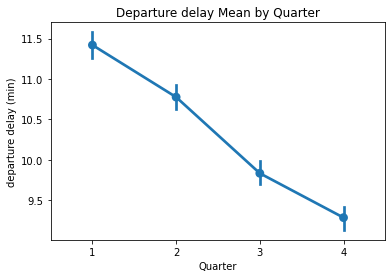

In [69]:
sb.pointplot(data = df, x = 'QUARTER', y = 'DEP_DELAY')
plt.title('Departure delay Mean by Quarter')
plt.xlabel('Quarter')
plt.ylabel('departure delay (min)');

This is a plot that shows the average departure delay for each quarter. Because quarter is an ordinal variable, I decided to keep the line between the average points.

- The longest departure delay average is in the first quarter.
- The departure delay average decreases each quarter through the year.

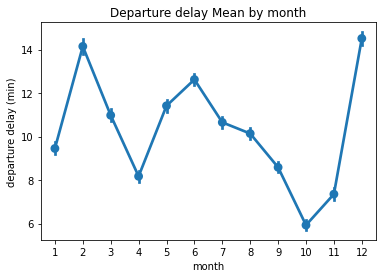

In [70]:
sb.pointplot(data = df, x = 'MONTH', y = 'DEP_DELAY')
plt.title('Departure delay Mean by month')
plt.xlabel('month')
plt.ylabel('departure delay (min)');

This is the same plot as the previous one but this time by the month variable.

- Clearly the averages in departure delay depend on the month.
- The months with the longest departure delays in minutes on average are December, February, and Juin. (ordered)
- The months witht the shortest departure delays in minutes on average are October, April, and January. (ordered)

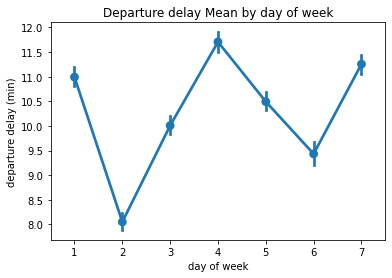

In [71]:
sb.pointplot(data = df, x = 'DAY_OF_WEEK', y = 'DEP_DELAY')

plt.title('Departure delay Mean by day of week')
plt.xlabel('day of week')
plt.ylabel('departure delay (min)');

Again and for the day of the week

- There are days where departure delays are longer.
- The day with the longest departure delay is Thursday.
- The day with the shortest departure delay is Tuesday.

Next, we are going to look at the departure delays in the busiest airports.

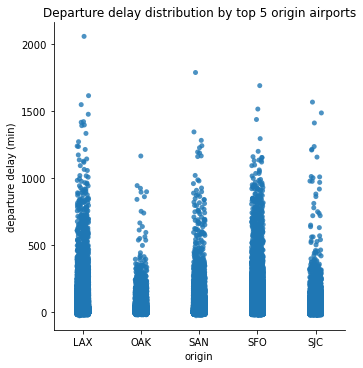

In [72]:
a = df.ORIGIN.value_counts()[:5]
a = a.index

df1 = df.loc[df['ORIGIN'].isin(a)]


sb.catplot(y="DEP_DELAY", x="ORIGIN", data= df1 , color = sb.color_palette()[0] , alpha = 0.8)

plt.title('Departure delay distribution by top 5 origin airports')
plt.xlabel('origin')
plt.ylabel('departure delay (min)');

First, I plotted departure delays per aiport in a scatter plot with jitter. I chose to plot only 5 airports with the most flights.

- we can see that SFO airport's flights are scoring more delays than the other airports.
- for SFO and LAX airports, they departure delays ranging from 500 minutes to 1000 times are very frequent.
- the longest departure delay happened in LAX airport (more than 2000 minutes).
- OAK and SJC airports flight departure delays are usually less than 500 minutes. However, they scored delays that reached 1500 minutes.

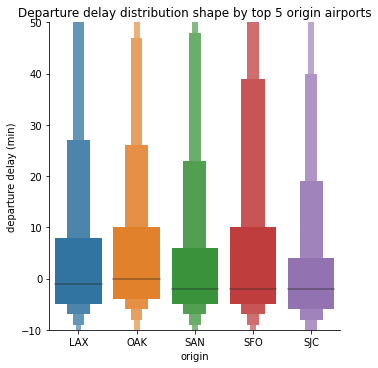

In [73]:
a = df.ORIGIN.value_counts()[:5]
a = a.index

df1 = df.loc[df['ORIGIN'].isin(a)]

sb.catplot(x="ORIGIN", y="DEP_DELAY", kind="boxen", data=df1)
plt.ylim(-10 , 50)

plt.title('Departure delay distribution shape by top 5 origin airports')
plt.xlabel('origin')
plt.ylabel('departure delay (min)');

This is a boxplot of the same data as the previous plot. Please note I used axis limit (ylim = [-10 , 50]) to be able to see the shape of the data clearly.

- the plot proves the conclusions I made from the previous plot.
- Long departure delays are more frequent in SFO airport.

In this plot we can also see the negative departure delays which represent early departures.

Now we are going to look at Arrival delays and their relationship with destination airports

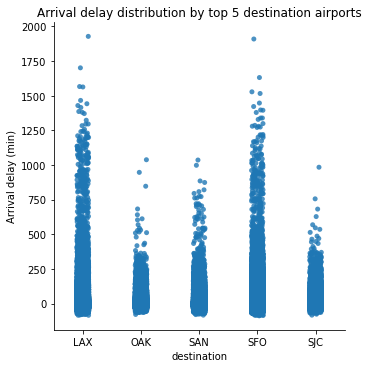

In [74]:
a = df.DEST.value_counts()[:5]
a = a.index

df1 = df.loc[df['DEST'].isin(a)]

sb.catplot(y="ARR_DELAY", x="DEST", data= df1 , color = sb.color_palette()[0] , alpha = 0.8)
plt.title('Arrival delay distribution by top 5 destination airports')
plt.xlabel('destination')
plt.ylabel('Arrival delay (min)');

Here I plotted a scatter plot of the arrival delay in minutes for the busiest destination airports.

- SFO and LAX are scoring very large arrival delays comparing to the other airports.
- The arrival delays in SFO and LAX airports reach 1250 minutes very frequently.

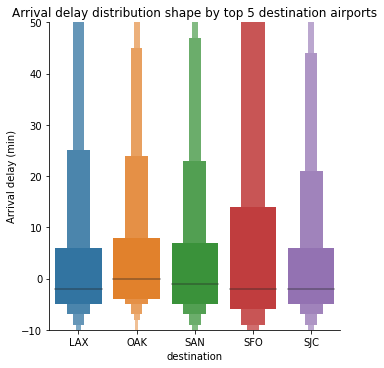

In [75]:
a = df.DEST.value_counts()[:5]
a = a.index

df1 = df.loc[df['DEST'].isin(a)]

sb.catplot(x="DEST", y="DEP_DELAY", kind="boxen", data=df1)
plt.ylim(-10 , 50)
plt.title('Arrival delay distribution shape by top 5 destination airports')
plt.xlabel('destination')
plt.ylabel('Arrival delay (min)');

- SFO airport is the airport with the longest delays.

NEXT, We are going to investigate the numeric variables. I want to look at the pairwise correlations present between features in the data.

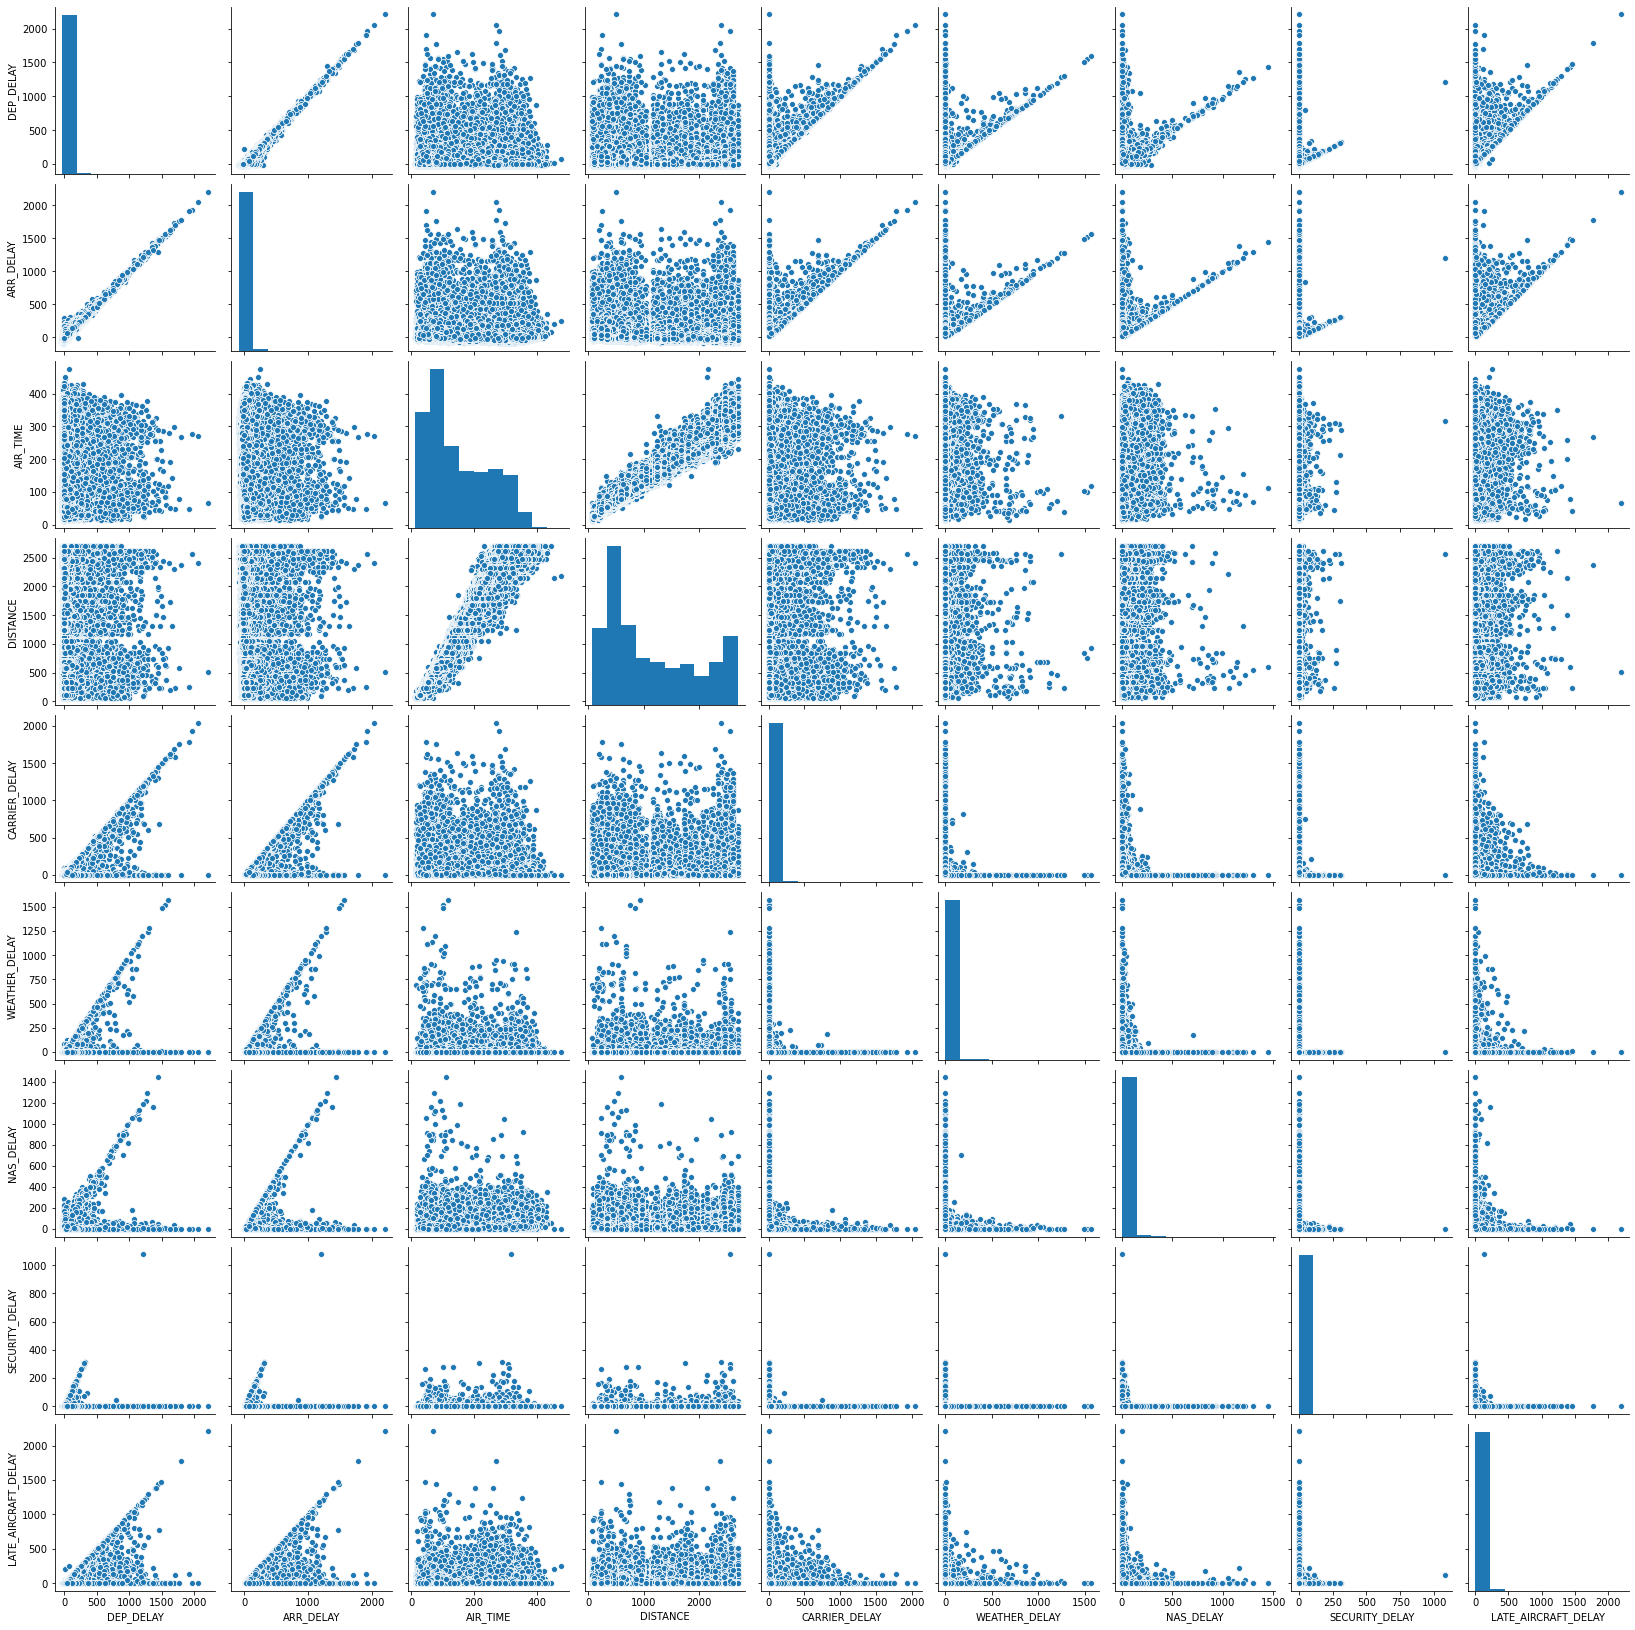

In [76]:
numeric_vars = ['DEP_DELAY' , 'ARR_DELAY', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY',
               'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']

sb.pairplot(data = df , vars = numeric_vars );

There seem to a lot of correlated variables in our dataset. Let's focus on our main feature DEP_DELAY

- a very high positive correlation can be spotted between departure delay and arrival delay. which explains why airports with the longest departure delays also score the longest arrival delays.
- positive correlations exist between departure delay and carrier, weather, NAS, security and aircraft. But Late aircraft seem to affect the departure delay stronger than the other causes of delay.
- Security delay does not look like it has a high correlation with departure delay.
- Distance and Airtime don't show any correlation with Departure delay. This means that long departure delays don't have any relationship with long distance flights or long air time flights.
- there is however a strong correlation between distance and air time which is logical.
- there is no correlation between the causes of delays whatsoever.

NEXT, we are going to look as a correlation heatmap to check if the conclusions I made from the scatter plots are correct.

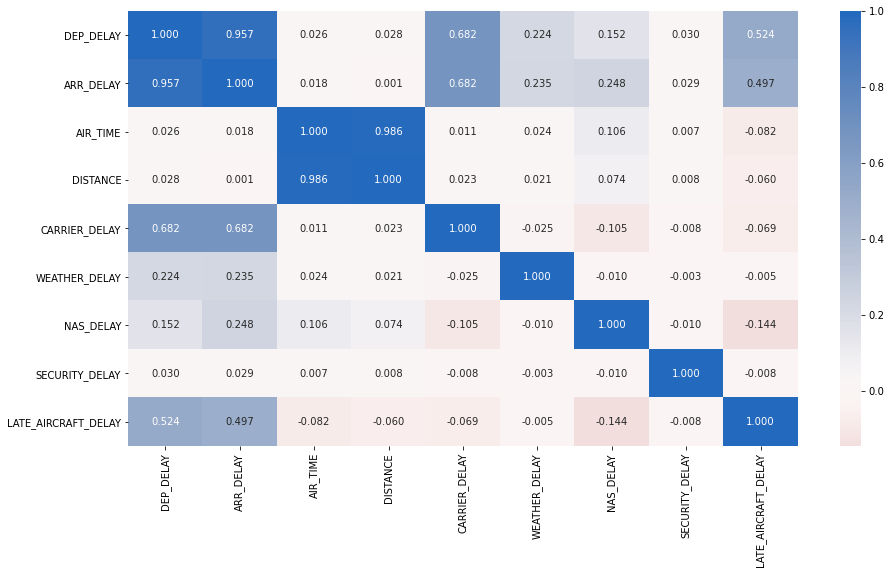

In [77]:
plt.figure(figsize = [15, 8])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

It seems like all my conclusions were correct.

So now it is time to explore the second dataset, the cancelled flights dataset. let's get to it!

First, because the dataset's categorical variables are the most interesting to us, we are going to explore this short summary about them

In [78]:
df_cancelled.describe(exclude=[np.number])

,FL_DATE,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST,DEST_CITY_NAME,DEST_STATE_ABR,CRS_DEP_TIME,CRS_ARR_TIME,CANCELLATION_CODE
count,20311,20311,20311,20311,20311,20311,20311,20311,20311,20311
unique,365,99,96,37,97,93,37,978,1193,4
top,2019-02-13,SFO,"San Francisco, CA",CA,SFO,"San Francisco, CA",CA,0 days 06:00:00.000000000,0 days 11:10:00.000000000,A
freq,298,3564,3564,13820,3570,3570,13736,460,139,10367


I am going to start my bivariate exploration with a faceting plot of the cancellation code variable (main feature) for each month. 

Remember :

A = carrier

B = weather

C = NAS - National Air System

D = security

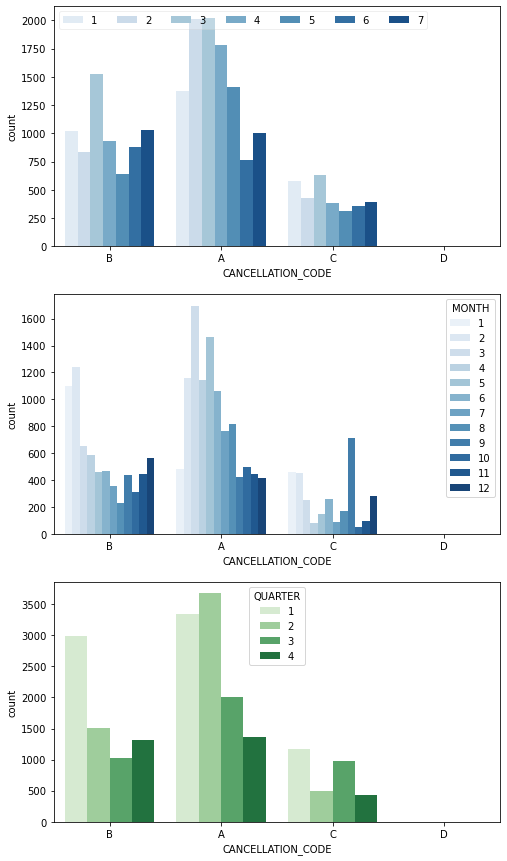

In [79]:
plt.figure(figsize = [8, 15])

plt.subplot(3, 1, 1)
ax = sb.countplot(data = df_cancelled, x = 'CANCELLATION_CODE', hue= 'DAY_OF_WEEK', palette = 'Blues' )
ax.legend(ncol = 7, framealpha = 0.3)
          
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df_cancelled, x = 'CANCELLATION_CODE', hue= 'MONTH', palette = 'Blues')

ax = plt.subplot(3, 1, 3)
sb.countplot(data = df_cancelled, x = 'CANCELLATION_CODE', hue= 'QUARTER', palette = 'Greens' );

plt.show()

This is a plot of the cancelled flights count by cancellation code per quarter, month, and day of the week.

First, the day of week :
- Carrier delays are the cause of flight cancellation the most on Wednesday.

Second, the month :
- Carrier delays cancel more flights on March and May
- Weather delays are the reason for flight cancellation the most from November to March. (winter season)
- NAS delays are causing flights to be cancelled significantly on September.

Finally, the Quarter :
- The first quarter is where fligths got delayed the most due to weather.
- Carrier delays caused more flight cancellation in the second quarter.
- NAS delays cancelled flights on the first and third quarter the most.


Next, Scheduled departure time and Cancelattion code ?

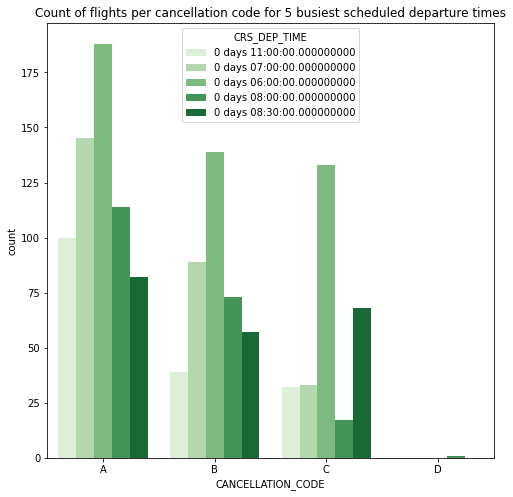

In [80]:
a = df_cancelled.CRS_DEP_TIME.value_counts()[:5]
a = a.index

df1 = df_cancelled.loc[df_cancelled['CRS_DEP_TIME'].isin(a)]

plt.figure(figsize = [8, 8])
sb.countplot(data = df1, x = 'CANCELLATION_CODE', hue= 'CRS_DEP_TIME', palette = 'Greens' )
plt.title('Count of flights per cancellation code for 5 busiest scheduled departure times');

Here we investigate the number of flights cancelled by Cancellation code at the 5 busiest scheduled departure times.

- the count of flights cancelled vary by scheduled departure time for each cancellation code.
- more flights are cancelled at 6 am disregarding the cancellation cause.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
> There is a great relationship between the date, airport, and departure time and the departure delay.

> I observed that the cause of Cancellation of flights is strongly related to the date of the flight.

## Multivariate Exploration

> The main thing I want to explore in this part of the investigation is how the categorical variables play into the relationship between flight delay and flight cancellation.

First, for the main dataset, let's look at the relationship between the different variables of cause of delay in each of the 5 busiest airports.

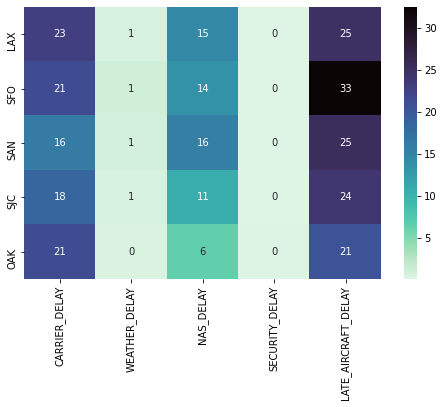

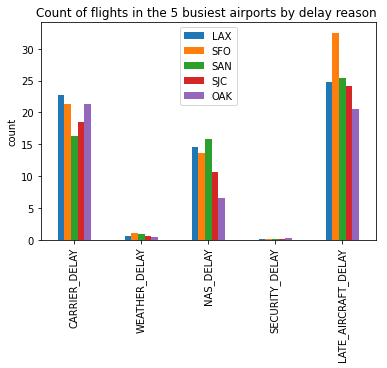

In [81]:
a = df.ORIGIN.value_counts()[:5]
a = a.index

b = df.groupby('ORIGIN').mean()
ct_counts = b.loc[a][['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']]

plt.figure(figsize = [8, 5])

sb.heatmap(ct_counts, annot = True, fmt = '.0f', cmap = 'mako_r');

ct_counts.T.plot(kind='bar')
plt.title('Count of flights in the 5 busiest airports by delay reason ')
plt.ylabel('count');

we've seen earlier that late aircraft and carrier delay have the highest impact on departure delay.

in this plot we are looking at the AVERAGE delay in each of the 5 airports from the different causes of delay.

- On average, the highest delays happen in SFO airport caused by Late aircraft. the delays is 33 minutes.
- The average delay caused by security is 0 minutes (no delay) in all 5 airports.
- weather delays are only 1 minutes long on avergae in all the 5 airports.
- Average NAS delays range from 6minues to 16 minutes.
- Carrier average delays are the second highest and range from 16 minutes to 23 minutes.
- The longest delays happen because of Late aircraft in all the 5 airports and range on average from 21 minutes to 33 minutes.


NEXT, for the cancelled flights.

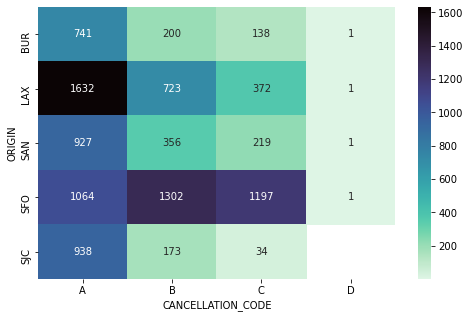

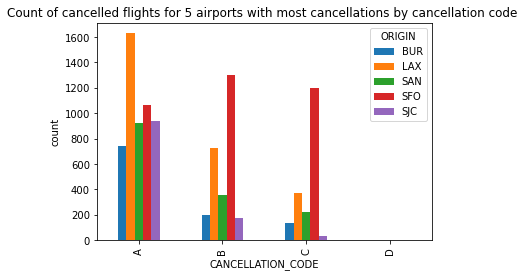

In [82]:
a = df_cancelled.ORIGIN.value_counts()[:5]
a = a.index
b = df_cancelled.groupby(['ORIGIN', 'CANCELLATION_CODE']).size()
ct_counts = b.loc[a]
ct_counts = ct_counts.reset_index()
ct_counts = ct_counts.pivot(index = 'ORIGIN', columns = 'CANCELLATION_CODE', values = 0)

plt.figure(figsize = [8, 5])
sb.heatmap(ct_counts , annot = True, fmt = '.0f' , cmap = 'mako_r')

ct_counts.T.plot(kind='bar')
plt.title('Count of cancelled flights for 5 airports with most cancellations by cancellation code ')
plt.ylabel('count');

In this plot, we investigate the number of flights cancelled in the for the different causes for each of the 5 busiest airport.

- Carrier is the cause of cancellation the most frequent in all the airports.
- SFO Airport has very high number of cancellation caused first by Carrier then by weather and then NAS.
- The highest number of cancelled flights (1632) is registered in LAX airport and it was due to Carrier.

### The relationships I observed in this investigation:

> As a conclusion, I can say that some Airports are home for delays and flight cancellation. However, in each of the airports with the most flights and cancelled flights, a cause of delay or cancellation is more frequent than the others.

> A deep relationship occurs between the date of the flight and its delay or cancellation. We have seen the Quarter, Month, and Day of the week where these delays and cancellations happen the most. we also seen the trend of flight delays and flight cancellation in each our 5 busiest airports by date.

> We've also seen that Carrier and Late aircraft are the two most common reasons for flights being cancelled or delayed.

> I have also concluded that most of the delays happen in the morning early flights.


In [83]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'exploration.ipynb'])

0